PYMACEUTICALS

In [97]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import itertools

In [98]:
# Files path
mouse_drug_data_to_load = "./Resources/Mouse_metadata.csv"
clinical_trial_data_to_load = "./Resources/Study_results.csv"

# Read data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


In [99]:
#merge databases
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID","Mouse ID"])

clinical_data_complete.head(5)





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Initial Statistics

Text(0.5, 1.0, 'Cases of study per Regimen')

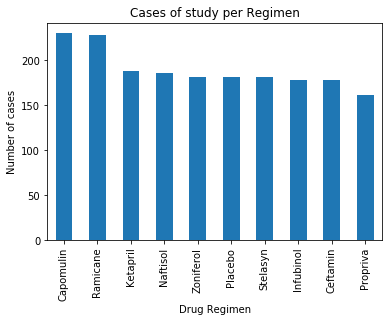

In [100]:
# GRAPH 1 - Scatter plot of tumor changes over time for each treatment

#total cases per Drug
counts = complete_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of cases")
plt.title("Cases of study per Regimen")

In [ ]:
##Tumor volume changes over time per Drug Regimen

In [94]:
# MEAN Tumor volume changes over time per treatment

data_by_drug_mean = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).mean()["Tumor Volume (mm3)"]

data_by_drug_mean = pd.DataFrame(data_by_drug_mean)

data_by_drug_mean = data_by_drug_mean.reset_index()
data_by_drug_mean


,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [108]:
# SEM Tumor volume changes over time per treatment

data_by_drug_sem = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).sem()["Tumor Volume (mm3)"]

data_by_drug_sem = pd.DataFrame(data_by_drug_sem)

data_by_drug_sem = data_by_drug_sem.reset_index()
data_by_drug_sem

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


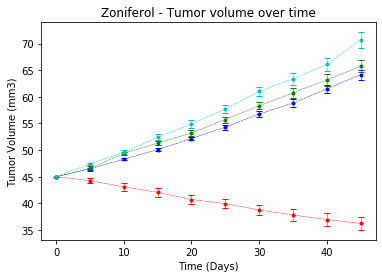

In [112]:
#scatter plot

#Capomulin
data_by_drug_mean_Capomulin = data_by_drug_mean.loc[data_by_drug_mean['Drug Regimen'] == "Capomulin"]
data_by_drug_sem_Capomulin = data_by_drug_sem.loc[data_by_drug_mean['Drug Regimen'] == "Capomulin"]

plt.errorbar(data_by_drug_mean_Capomulin['Timepoint'], data_by_drug_mean_Capomulin['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Capomulin['Tumor Volume (mm3)'], marker="o", color="r", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3)

#Ceftamin
data_by_drug_mean_Ceftamin = data_by_drug_mean.loc[data_by_drug_mean['Drug Regimen'] == "Ceftamin"]
data_by_drug_sem_Ceftamin = data_by_drug_sem.loc[data_by_drug_mean['Drug Regimen'] == "Ceftamin"]

plt.errorbar(data_by_drug_mean_Ceftamin['Timepoint'], data_by_drug_mean_Ceftamin['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Ceftamin['Tumor Volume (mm3)'], marker="o", color="b", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3)

#Infubinol
data_by_drug_mean_Infubinol = data_by_drug_mean.loc[data_by_drug_mean['Drug Regimen'] == "Infubinol"]
data_by_drug_sem_Infubinol = data_by_drug_sem.loc[data_by_drug_mean['Drug Regimen'] == "Infubinol"]

plt.errorbar(data_by_drug_mean_Infubinol['Timepoint'], data_by_drug_mean_Infubinol['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Infubinol['Tumor Volume (mm3)'], marker="o", color="g", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3)

#Ketapril
data_by_drug_mean_Ketapril = data_by_drug_mean.loc[data_by_drug_mean['Drug Regimen'] == "Ketapril"]
data_by_drug_sem_Ketapril = data_by_drug_sem.loc[data_by_drug_mean['Drug Regimen'] == "Ketapril"]

plt.errorbar(data_by_drug_mean_Ketapril['Timepoint'], data_by_drug_mean_Ketapril['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Ketapril['Tumor Volume (mm3)'], marker="o", color="c", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3)

#Naftisol
data_by_drug_mean_Naftisol = data_by_drug_mean.loc[data_by_drug_mean['Drug Regimen'] == "Naftisol"]
data_by_drug_sem_Naftisol = data_by_drug_sem.loc[data_by_drug_mean['Drug Regimen'] == "Naftisol"]

plt.errorbar(data_by_drug_mean_Naftisol['Timepoint'], data_by_drug_mean_Naftisol['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Naftisol['Tumor Volume (mm3)'], marker="o", color="c", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3)

#Placebo
#Propriva
#Ramicane
#Stelasyn
#Zoniferol


plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Zoniferol - Tumor volume over time')
plt.show()


In [65]:
# Tumor volume changes over time per treatment

#define variables:
tumor_vols_mean = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

tumor_vols_mean.head()

#create variables

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325

In [66]:
#Standar error mean funciton by drug and time
tumor_vols_sem = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).sem()["Tumor Volume (mm3)"]

tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

tumor_vols_sem.head(5)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

In [67]:
#pivot
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_pivot_mean.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [68]:
tumor_vols_pivot_sem.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [ ]:
#plot
plt.figure(figsize=(8,5))

#Ketapril
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Naftisol
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Naftisol"], yerr=tumor_vols_pivot_sem["Naftisol"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Placebo
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Propriva
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Propriva"], yerr=tumor_vols_pivot_sem["Propriva"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Ramicane
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ramicane"], yerr=tumor_vols_pivot_sem["Ramicane"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Stelasyn
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Stelasyn"], yerr=tumor_vols_pivot_sem["Stelasyn"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

#Zoniferol
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Zoniferol"], yerr=tumor_vols_pivot_sem["Zoniferol"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3)

plt.ylim(20,80)
plt.xlim(0,45)

plt.title("Response to treatment per drug", fontsize=20)
plt.ylabel("Tumor Volume (m3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox = True)

plt.show()

#save the plot
#plt.savefig("./Analysis/1-Response_to_treatment.png")


Text(0.5, 1.0, 'Cases of study per Regimen')

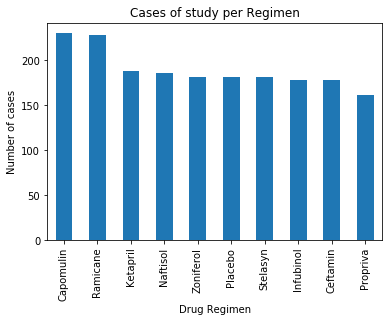

In [30]:
#per Drug Regimen - Capomulin

capomulin = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]

#plt.plot(capomulin_data['Av'],capomulin_data['Timepoint'])
#plt.plot(ramicane_data['Timepoint'],ramicane_data['Tumor Volume (mm3)'])
#plt.xlabel('Time')
#plt.ylabel('Sum of Tumor Volume (mm3)')
#plt.show()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


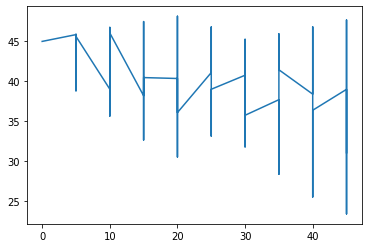

In [33]:
plt.plot(capomulin['Timepoint'],capomulin['Tumor Volume (mm3)'])
plt.show()

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

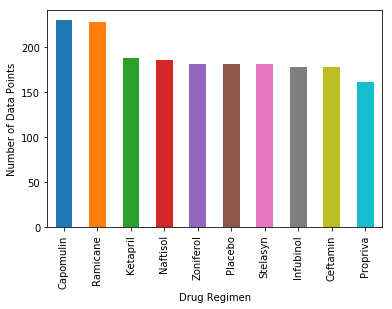

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

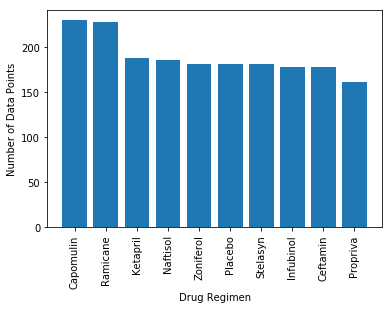

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

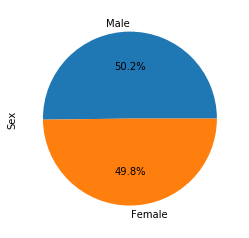

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

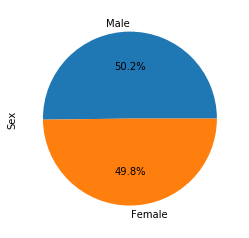

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(study_data_complete,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Quantitatively determine infubinol outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


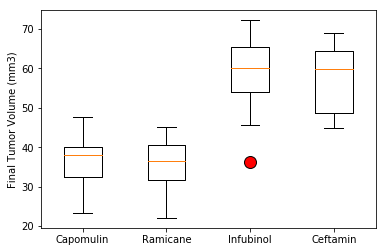

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

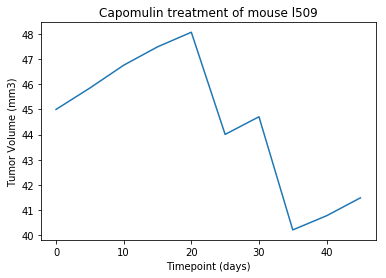

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

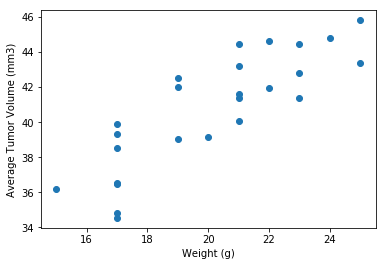

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


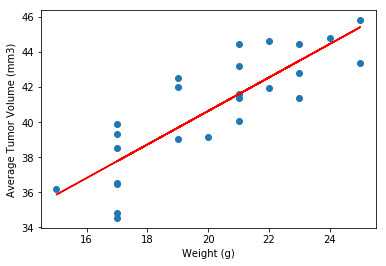

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()